# Understanding Perceptron

Perceptron algorithm is one of the most important algorithm ever found in Artifical Intelligence. There has not been any books related to AI and Machine learning in which Perceptron has not been mentioned.

## From AI PETERNORVIG
The perceptron covergence theorem says that the learning algorithm can adjust the connection strengths of a perceptron to match any input data, provided such a match exists
A third difficulty arose because of some fundamental limitations on the basic structures
being used to generate intelligent behavior. For example, Minsky and Papert’s book Percep-
trons (1969) proved that, although perceptrons (a simple form of neural network) could be
shown to learn anything they were capable of representing, they could represent very little. In
particular, a two-input perceptron (restricted to be simpler than the form Rosenblatt originally
studied) could not be trained to recognize when its two inputs were different. Although their
results did not apply to more complex, multilayer networks, research funding for neural-net
research soon dwindled to almost nothing. Ironically, the new back-propagation learning al-
gorithms for multilayer networks that were to cause an enormous resurgence in neural-net
research in the late 1980s were actually discovered first in 1969 (Bryson and Ho, 1969).

The perceptron learning rule converges to a perfect linear separator when the data points are linearly separpable.

Single-layer feed forward neural networks

NOTE TO ME

AND GATE OR GATE works but XOR does not

A linear classifier with a hard threshold—also known as a perceptron—can be trained
by a simple weight update rule to fit data that are linearly separable. In other cases,
the rule fails to converge.

Frank Rosenblatt (1957) invented the modern “perceptron” and proved the percep-
tron convergence theorem (1960), although it had been foreshadowed by purely mathemat-
ical work outside the context of neural networks

Consider a binary classification problem with$X = \mathbb{R}^d$ and 
$Y=\left\{-1,+1\right\}$. A model that could be used in this case is the perceptron, a term that
originated in artificial intelligence. More specifically, suppose the hypothesis space $\textbf{H}$ to consist of all function of the form 
            $ h : \textbf{x} \longmapsto sign\left\{ b + \sum_{n=i}^{d} w_i x_i \right\}$, where sign(s) =


In [57]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [70]:
class Perceptron():
    def __init__( self ):
        self.weights = np.random.rand(3)
    
    def respond( self, x ):
        prediction = np.dot(self.weights, x)
        if prediction >= 0:
            return 1
        else:
            return -1
    def updateWeights( self, x, y, prediction ):
        self.weights = self.weights + (y - prediction) * x

    def train( self, X, Y ):
        learned = False
        iteration = 0
        #fig, ax = plt.subplots()

        while not learned or iteration < 1000:
            globalError = 0
            for i in range(0, X.shape[ 0 ]):
                prediction = self.respond(X[ i ])
                if prediction != Y[ i ]:
                    self.updateWeights(X[ i ], Y[ i ], prediction)
                    globalError += 1
                    #self.drawHyperplane(X,Y,ax)
                    self.drawHyperplane(X, Y,iteration)
                iteration += 1

            if globalError == 0:
                learned = True
                
    def drawHyperplane( self, X, Y,iteration):

        a = - self.weights[1] / self.weights[2]
        xx = np.linspace(0, 5)
        yy = a * xx - self.weights[0] / self.weights[2]
        col = np.where(Y > 0, 'b', 'r')
        plt.cla()
        plt.scatter(X[:, 1], X[:, 2], c=col, s=10)
        plt.plot(xx, yy, 'k-')
        plt.title(iteration)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.axis('tight')
        plt.draw()
        plt.pause(0.1)
    

In [59]:
def displayDatapoints( X, Y ):
    col = np.where(Y > 0, 'b', 'r')
    plt.scatter(X[ :, 1 ], X[ :, 2 ], c=col, s=10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axis('tight')
    plt.show()

In [60]:
def Test( p, X, Y ):
    for i in range(0, X.shape[ 0 ]):
        print("Prediction ", p.respond(X[ i ]))
        print("Truth	   ", Y[ i ])

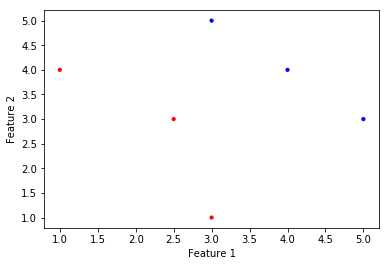

In [61]:

##Linearly sepearable Data
#First colum is for the bias term
X = np.array([ [ 1, 1, 4 ], [ 1, 3, 1 ], [ 1, 2.5, 3 ], [ 1, 4, 4 ], [ 1, 3, 5 ], [ 1, 5, 3 ], ])
Y = np.array([ -1, -1, -1, 1, 1, 1 ])

displayDatapoints(X, Y)


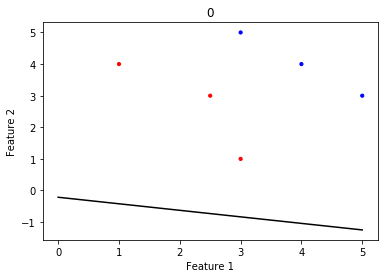

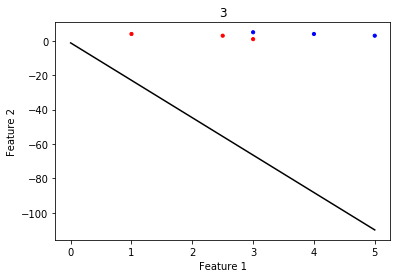

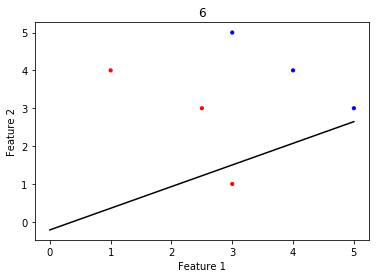

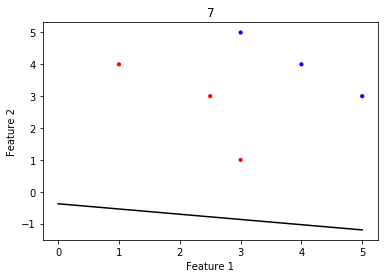

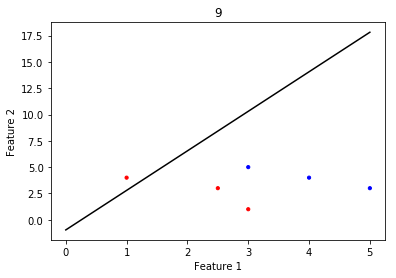

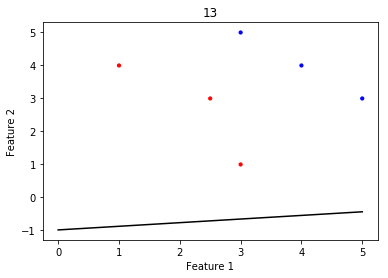

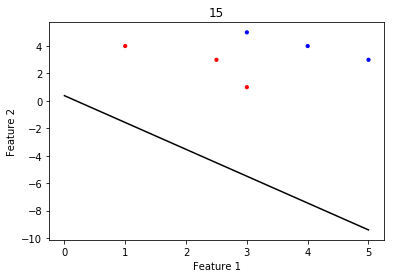

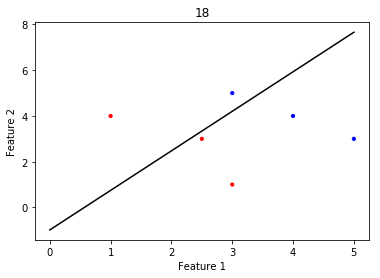

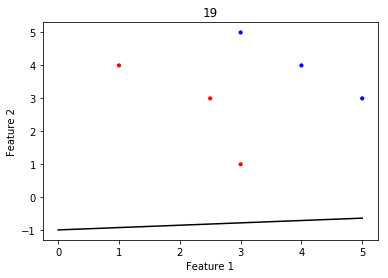

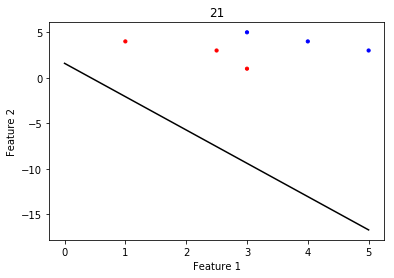

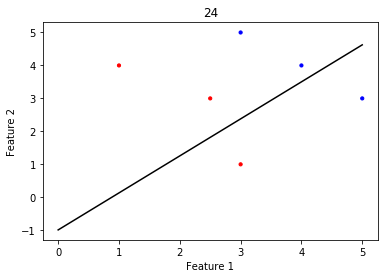

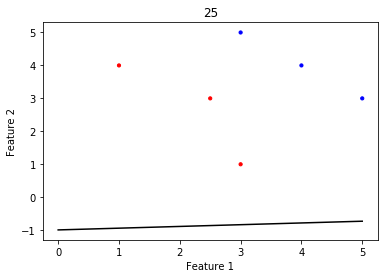

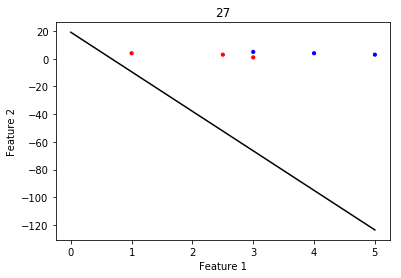

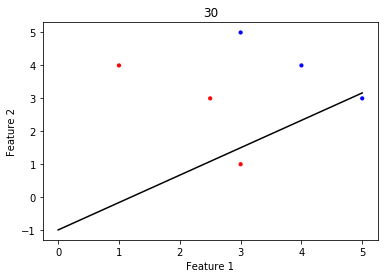

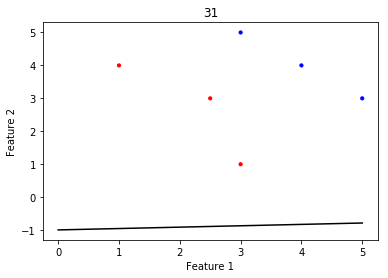

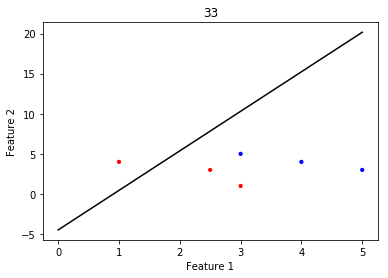

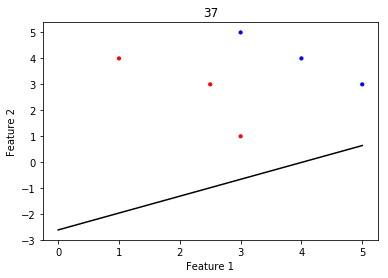

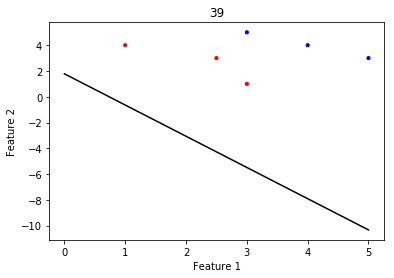

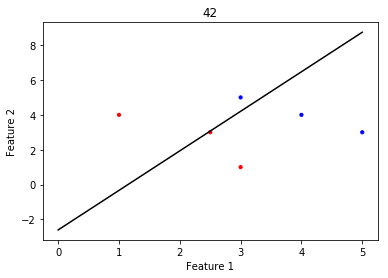

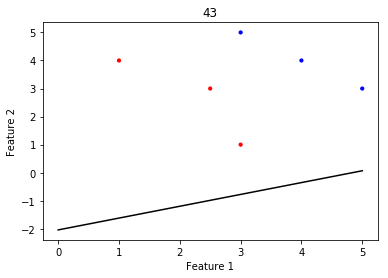

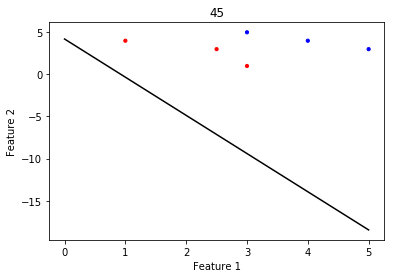

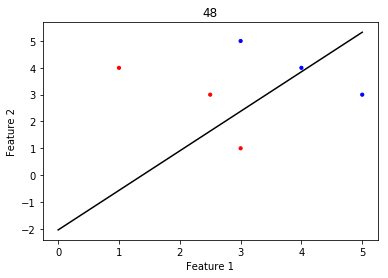

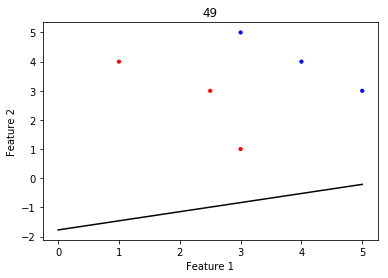

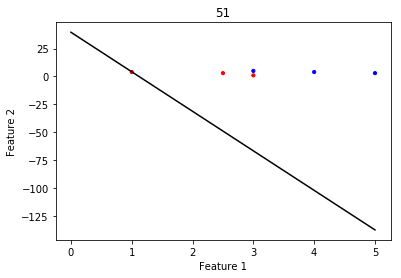

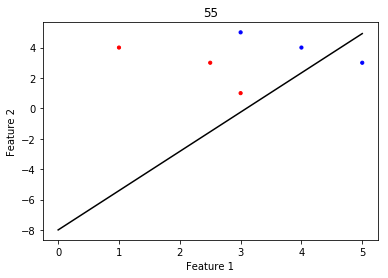

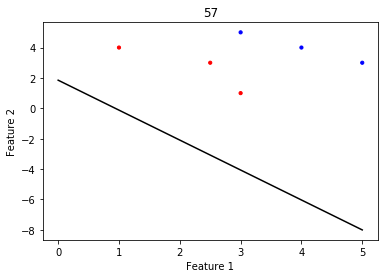

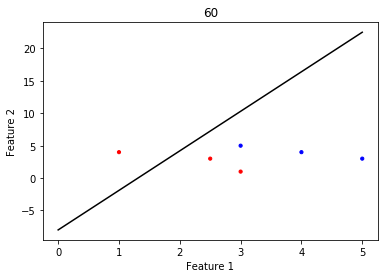

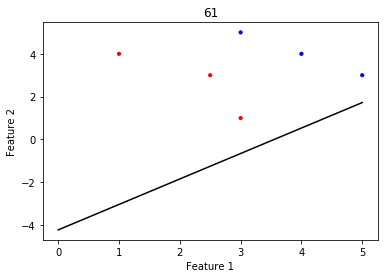

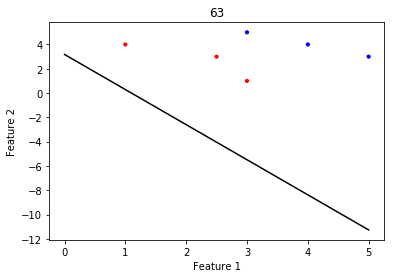

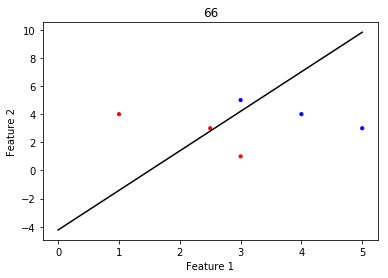

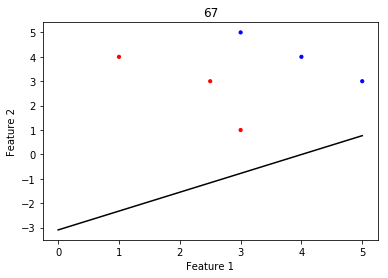

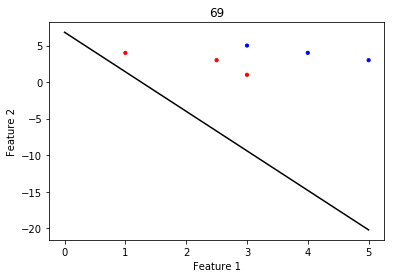

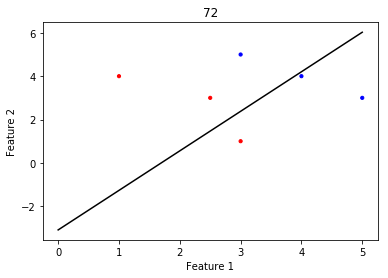

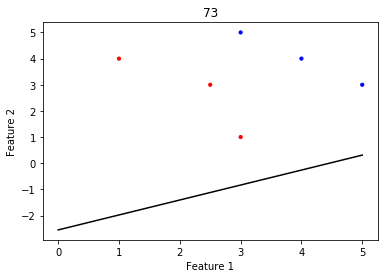

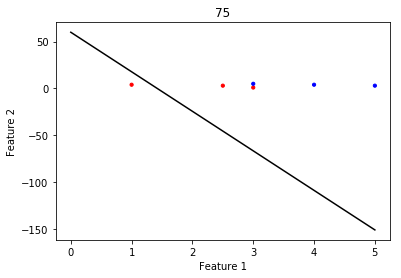

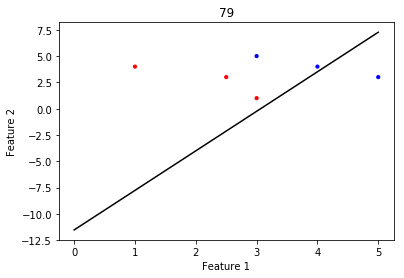

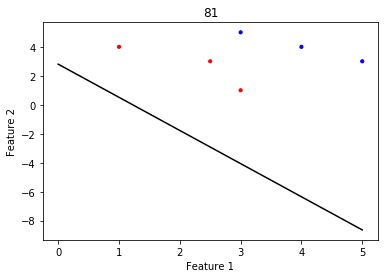

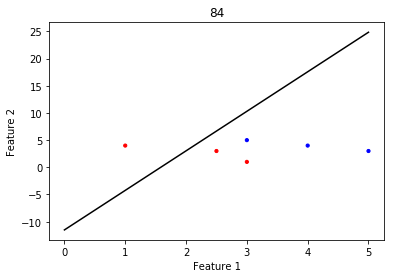

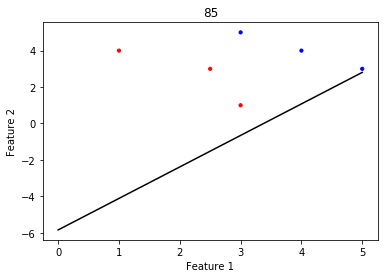

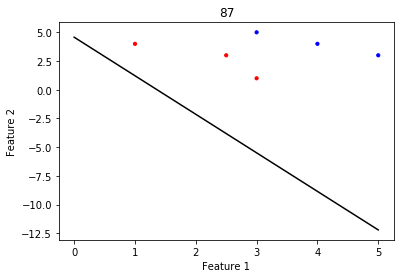

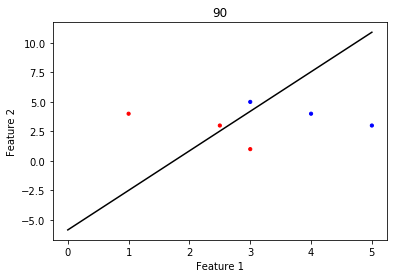

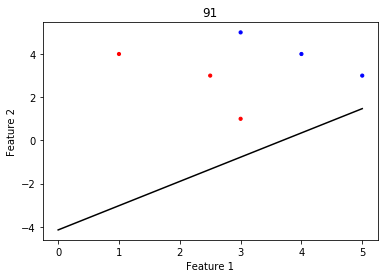

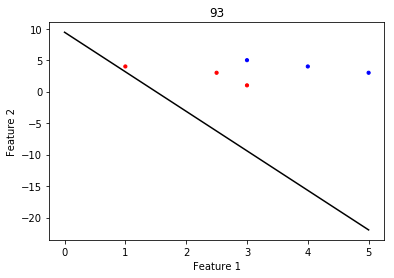

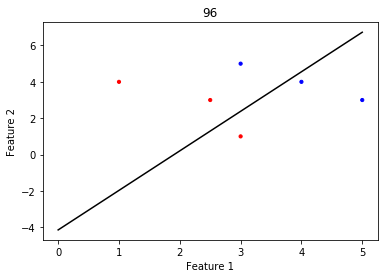

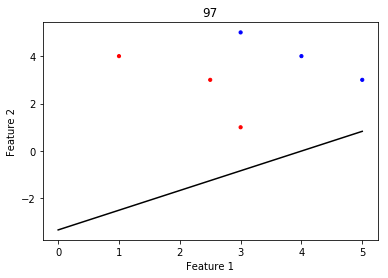

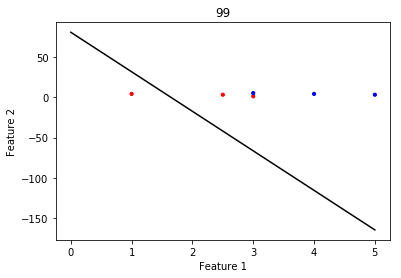

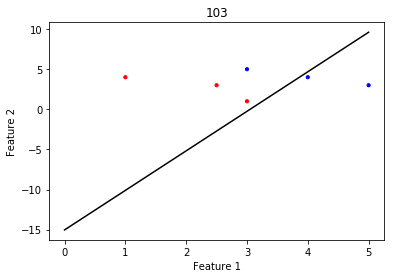

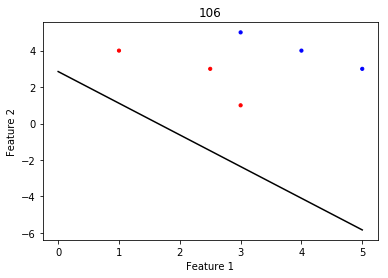

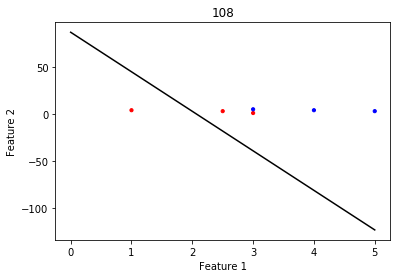

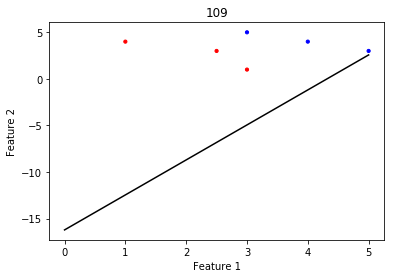

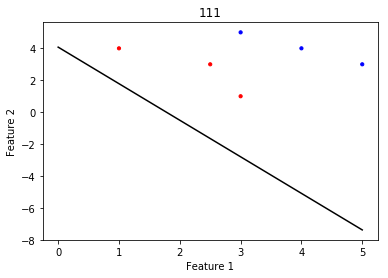

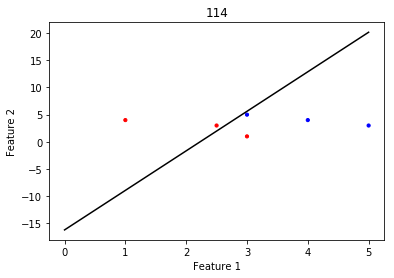

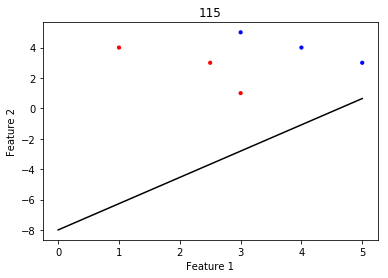

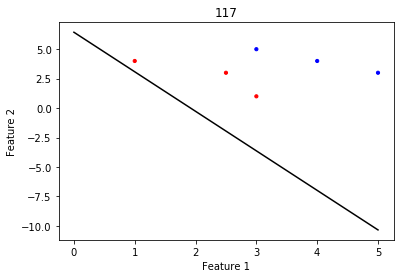

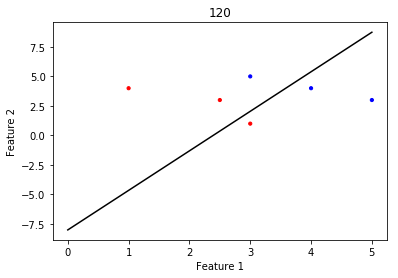

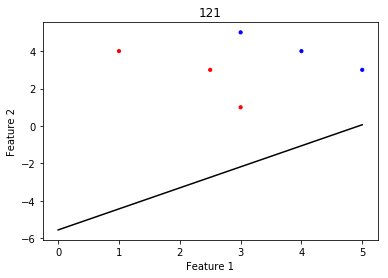

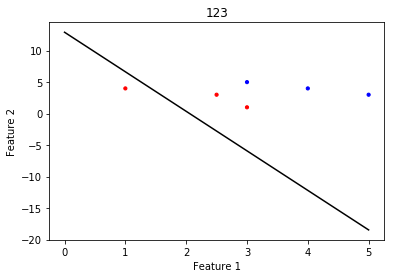

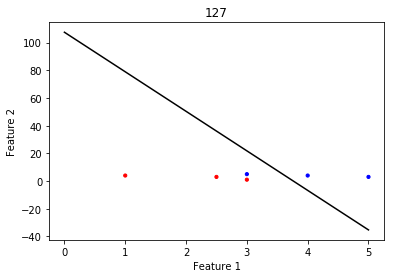

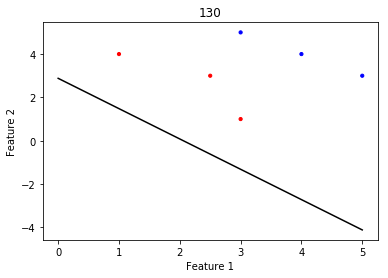

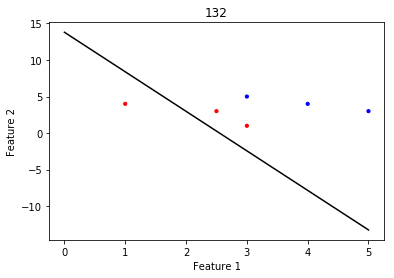

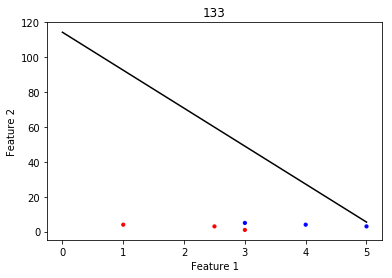

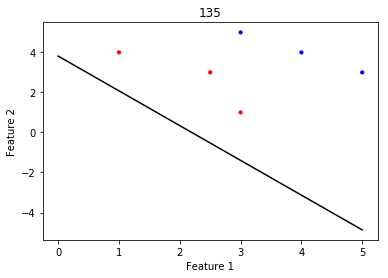

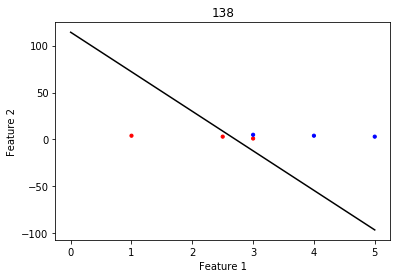

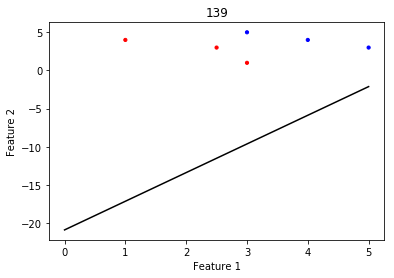

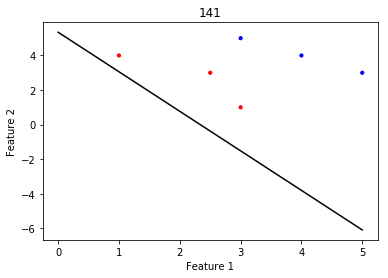

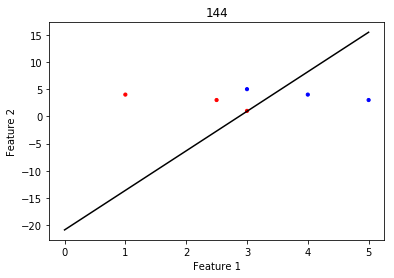

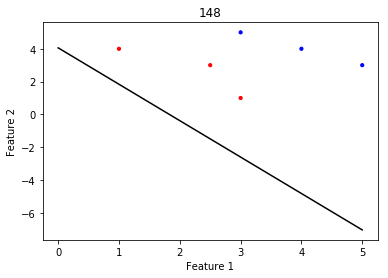

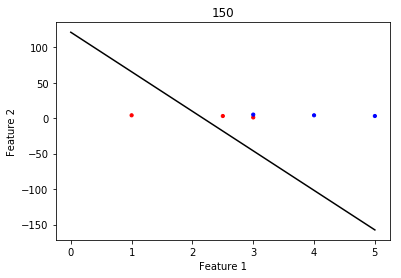

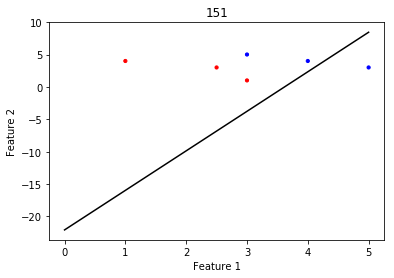

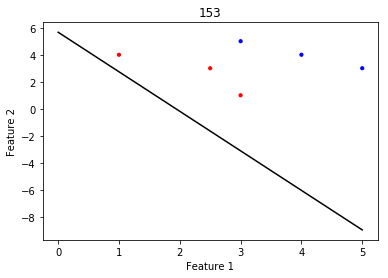

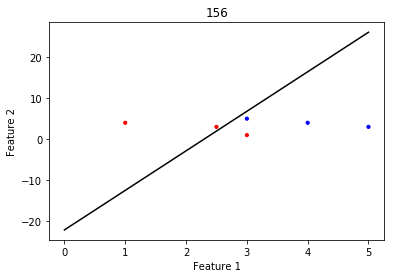

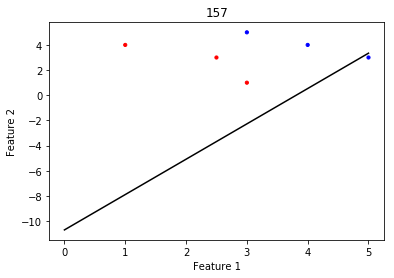

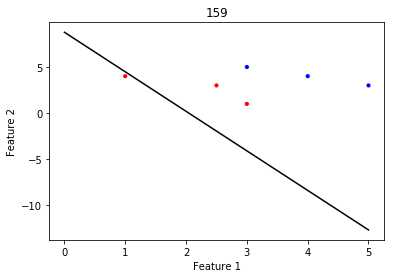

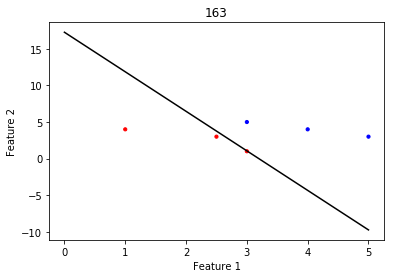

In [62]:
p = Perceptron()
p.train(X, Y)

In [63]:
Test(p, X, Y)

Prediction  -1
Truth	    -1
Prediction  -1
Truth	    -1
Prediction  -1
Truth	    -1
Prediction  1
Truth	    1
Prediction  1
Truth	    1
Prediction  1
Truth	    1
